# At what phase of the flight is the most damage occuring?

Compare damage happening within each phase of flight

	#Aircraft_damage
    #Phase_of_Flight

# At what phase of the flight are the most injuries occuring?

Compare each set of injuries with Phase of Flight

	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured

	#Injury_severity
    
    Injury severity??
    




## Import Packages and Data

In [3]:
#Import Packages

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#Import Data

planes = pd.read_csv('data/Clean_Aviation.csv')

## Inspect Data

In [5]:
#Inspect data
planes.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,Report_Status,Make_Model
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Stinson 108-3
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,Piper PA24-180
2,20061025X01555,NYC07LA005,1974-08-30,"SALTVILLE, VA",United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Cessna 172M
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Rockwell 112
4,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell douglas,DC9,2.0,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,Mcdonnell douglas DC9


In [6]:
planes.shape

(66604, 20)

In [7]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66604 entries, 0 to 66603
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                66604 non-null  object 
 1   Accident_Number         66604 non-null  object 
 2   Event_Date              66604 non-null  object 
 3   Location                66604 non-null  object 
 4   Country                 66604 non-null  object 
 5   Injury_Severity         66604 non-null  object 
 6   Aircraft_Damage         66604 non-null  object 
 7   Make                    66604 non-null  object 
 8   Model                   66604 non-null  object 
 9   Number_of_Engines       66604 non-null  object 
 10  Engine_Type             66604 non-null  object 
 11  Purpose_of_flight       66604 non-null  object 
 12  Total_Fatal_Injuries    66604 non-null  float64
 13  Total_Serious_Injuries  66604 non-null  float64
 14  Total_Minor_Injuries    66604 non-null

## Check out Phase_of_Flight and Aircraft Damage

In [8]:
planes['Phase_of_Flight'].value_counts()

Unknown        15069
Landing        13549
Takeoff        10199
Cruise          8788
Maneuvering     6441
Approach        5387
Taxi            1754
Climb           1690
Descent         1591
Go-around       1232
Standing         821
Other             83
Name: Phase_of_Flight, dtype: int64

In [9]:
planes['Aircraft_Damage'].value_counts()

Substantial    49506
Destroyed      13736
Minor           1809
Unknown         1553
Name: Aircraft_Damage, dtype: int64

## Plot Aircraft Damage by Phase of Flight

In [16]:
planesII = planes.copy()

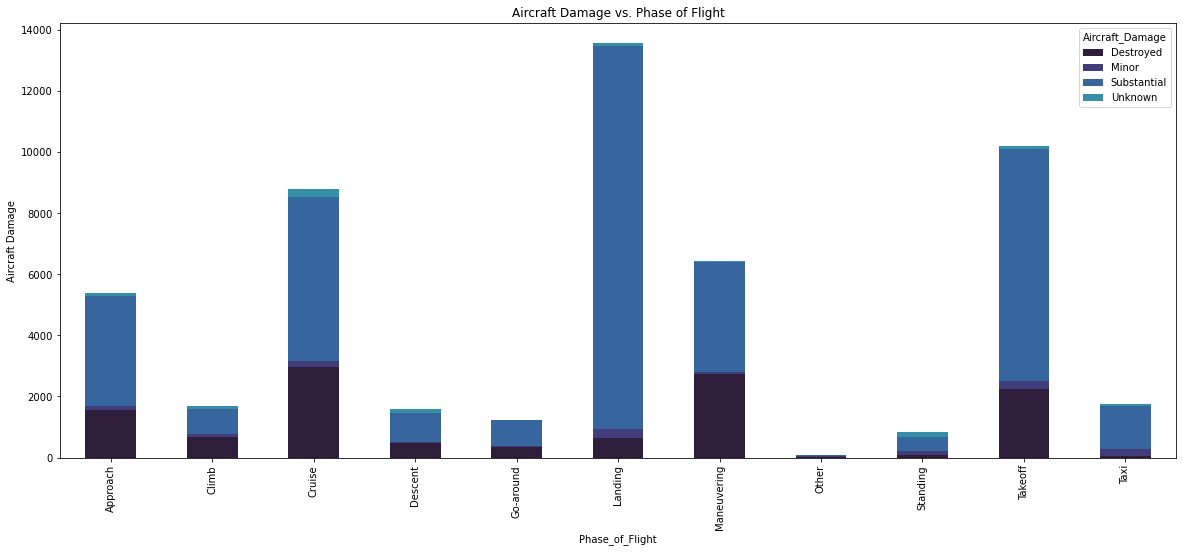

In [141]:
#Should we drop unknown?

noUNK = planes[planes['Phase_of_Flight'] != 'Unknown'] #remove unknowns from data

pohad = noUNK.groupby(['Phase_of_Flight', 'Aircraft_Damage']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_palette('mako')

plt.xlabel("Phase of Flight")
plt.ylabel("Aircraft Damage")
#plt.xticks(rotation = 45)
plt.title("Aircraft Damage vs. Phase of Flight")

pohad.plot(kind = 'bar', stacked = True, ax = ax);

## observations 
the most damage occurs during landing - mostly substantial
	by substantial, damage prohibits the aircraft from flying -- most damage in landing -perhaps landing gear -- must be fixed before flying again  
the most destroying damage happend on both cruise, takeoff, and maneuvering
no aircrafts (or very little) aircrafts seem to be destroyed during taxi
other seems to be least occuring/unrelevant



In [124]:
#make pivot table - perhaps for csv export?

POH_damage = pd.pivot_table(planesII, columns = ['Aircraft_Damage'], index = 'Phase_of_Flight', aggfunc = 'size')

#convert to dataframe
#
POH_damage_df = POH_damage.reset_index()
POH_damage_df = POH_damage_df.set_index('Phase_of_Flight')

#drop unknown column
POH_damage_df.drop(columns = 'Unknown', inplace = True)

#check
POH_damage_df



Aircraft_Damage,Destroyed,Minor,Substantial
Phase_of_Flight,,,
Approach,1539,142,3615
Climb,663,93,839
Cruise,2948,206,5367
Descent,466,58,945
Go-around,355,13,859
Landing,637,283,12537
Maneuvering,2746,42,3618
Other,27,8,45
Standing,91,120,444


## Plot Injuries by Phase of Flight

In [ ]:
#make total injuries column
planes['Total_Injuries'] = (planes['Total_Fatal_Injuries'] + 
                                  planes['Total_Minor_Injuries'] +
                                 planes['Total_Serious_Injuries'])

#check
planes.head()

In [142]:
#Should we group this in any way?
#planesII['Total_Injuries'] = planes['Total_Injuries'].value_counts().loc[lambda x: x > 5]


planesII['Total_Injuries'].value_counts()

0.0      38307
1.0      13452
2.0       8911
3.0       2618
4.0       1863
         ...  
171.0        1
97.0         1
101.0        1
275.0        1
53.0         1
Name: Total_Injuries, Length: 101, dtype: int64

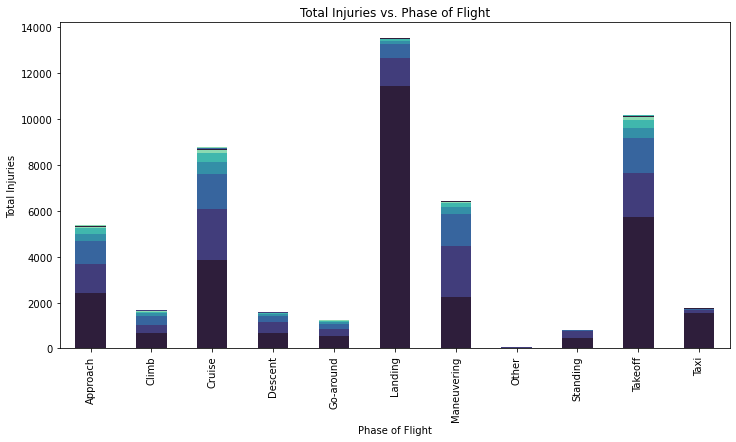

In [145]:
#plot injuries by phase of flight
noUNK = planes[planes['Phase_of_Flight'] != 'Unknown'] #remove unknowns from data

pohti = noUNK.groupby(['Phase_of_Flight', 'Total_Injuries']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize= (12, 6))

pohti.plot(kind = 'bar', stacked = True, ax = ax, legend = None);

plt.xlabel("Phase of Flight")
plt.ylabel("Total Injuries")
#plt.xticks(rotation = 45)
plt.title("Total Injuries vs. Phase of Flight");

#make 4 subplots?

## Aircraft Make by Injuries

In [34]:
planesII['Total_Injuries'].value_counts()

0.0      0.575146
1.0      0.201970
2.0      0.133791
3.0      0.039307
4.0      0.027971
           ...   
171.0    0.000015
97.0     0.000015
101.0    0.000015
275.0    0.000015
53.0     0.000015
Name: Total_Injuries, Length: 101, dtype: float64

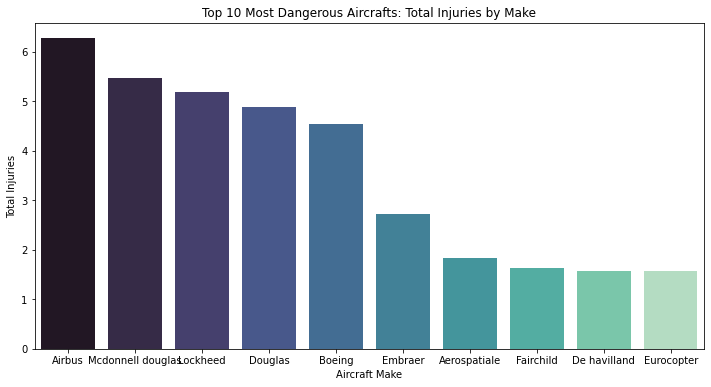

In [146]:
#most dangerous pivot table
Inj_Make_Pivot = pd.pivot_table(planesII, values = ['Total_Injuries'], index = 'Make')
sorted_IM_Pivot = Inj_Make_Pivot.apply(lambda x: x.sort_values(ascending = False).head(10))

#create dataframe from pivot table
DangerMake = {
    'Make': ['Airbus', 'Mcdonnell douglas', 'Lockheed', 'Douglas', 
             'Boeing', 'Embraer', 'Aerospatiale', 'Fairchild', 'De havilland', 'Eurocopter'],
    'Total_Injuries': [6.277978, 5.475379, 5.187500, 4.893939, 4.540573, 2.721212, 
                       1.843666, 1.632653, 1.577608, 1.564767]
}
plt.figure(figsize=(12,6))
sns.barplot(x = 'Make', y = 'Total_Injuries', data = DangerMake, palette = 'mako')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Top 10 Most Dangerous Aircrafts: Total Injuries by Make');

#add values if easy

#combine the mcdonnell and douglas

Observations: Across the data, Airbus had the highest average injuries of 6.277
	the highest averages seem to be popular aircraft companies/larger airplanes. That may accounts for the skew for higher total average 
    	eurocopter = airbus but still in data? need clarification on what model is (cause for further investigation)


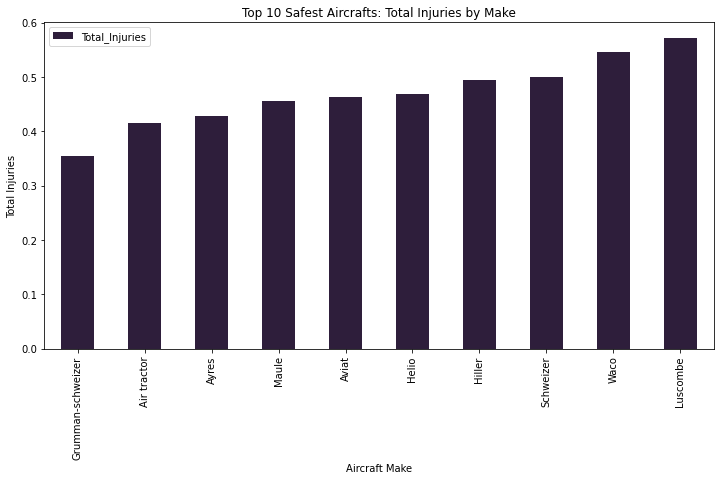

In [157]:
#least dangerous pivot table
least_injured = pd.pivot_table(planesII, values = ['Total_Injuries'], index = 'Make')
sorted_least_injured = least_injured.apply(lambda x: x.sort_values(ascending = True).head(10))
sorted_least_injured

#create dataframe from pivot table

least_inj_df = sorted_least_injured.reset_index()
least_inj_df = least_inj_df.set_index('Make')



fix, ax = plt.subplots(figsize=(12,6))
sns.set_palette = 'mako'

least_inj_df.plot(kind = 'bar', stacked = False, ax = ax)

plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Top 10 Safest Aircrafts: Total Injuries by Make');
#plt.xticks(rotation=45);

Observations: 
    Grummen-schwelzer with the least amount of injuries
    difference between top 10 and bottom 10 is > 5 average injuries
    Air tractor = farming plane not passenger plane
    these aircraft companies could make smaller passenger planes overall which account for their low average injuries
    Some helicopter companies in the mix

## Aircraft Damage by Aircraft Make

In [85]:
planesII.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Number_of_Engines,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,Report_Status,Make_Model,Total_Injuries
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,1.0,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Stinson 108-3,2.0
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,1.0,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,Piper PA24-180,4.0
2,20061025X01555,NYC07LA005,1974-08-30,"SALTVILLE, VA",United States,Fatal,Destroyed,Cessna,172M,1.0,...,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Cessna 172M,3.0
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,1.0,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,Rockwell 112,2.0
4,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell douglas,DC9,2.0,...,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,Mcdonnell douglas DC9,1.0


In [128]:
#most dangerous pivot table
most_damage = pd.pivot_table(planesII, columns = ['Aircraft_Damage'], index = 'Make', aggfunc = 'size')

#convert to dataframe
most_damage_df = most_damage.reset_index()
most_damage_df = most_damage_df.set_index('Make')
most_damage_df[["Destroyed","Minor","Substantial"]] = most_damage_df[["Destroyed","Minor","Substantial"]].fillna(0)

#drop unknown column
most_damage_df.drop(columns = 'Unknown', inplace = True)


#create top 10 and bottom 10


#normalize columns


#create normalized total column


#check
most_damage_df.head()

Aircraft_Damage,Destroyed,Minor,Substantial
Make,,,
Aero commander,137.0,5.0,266.0
Aeronca,91.0,5.0,514.0
Aerospatiale,104.0,21.0,221.0
Air tractor,151.0,12.0,672.0
Airbus,13.0,78.0,45.0


Text(0.5, 1.0, 'Aircraft Damage by Make')

<Figure size 864x576 with 0 Axes>

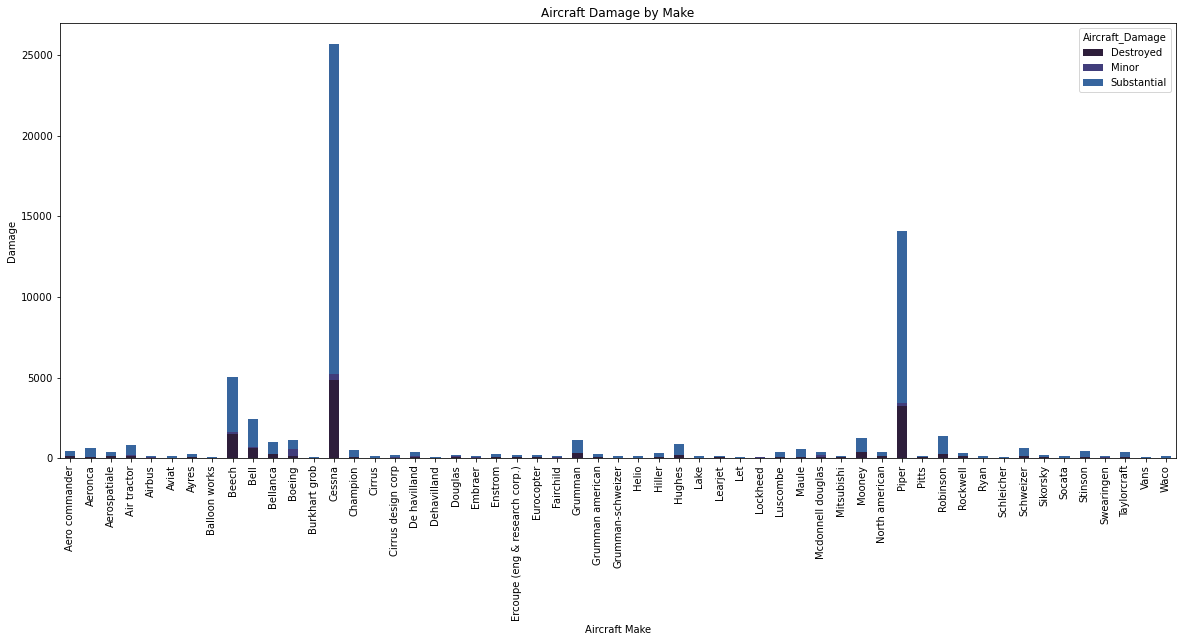

In [160]:
# plot 

plt.figure(figsize=(12,8))

ax = most_damage_df.plot(kind = 'bar', stacked = True, figsize = (20,8))
plt.xlabel('Aircraft Make')
plt.ylabel('Damage')
plt.title('Aircraft Damage by Make')
#sns.set_palette('mako');

#plt.xticks(rotation=45);

Observations:
    Cessna and Piper have the highest number of damage reports

# Safety Scoring

In [26]:
#Copy Planes for the purposes of trying things
planesII = planes.copy()

In [27]:
planesII.head()
planesII['Injury_Severity'].value_counts()
planesII['Model'].value_counts()

152                  2325
172                  1615
172N                 1136
PA-28-140             898
150                   787
                     ... 
C-12C                   1
A-320-212               1
T-34C                   1
316B ALOUETTE III       1
At-301                  1
Name: Model, Length: 5248, dtype: int64

In [144]:
#points dictionary
#weather = {'IMC': 2, 'VCM': 1}
#engine = {most risky engine to least risky engine}
#severity = {'Fatal': 5, 'Serious': 4, 'Incident': 3, 'Minor': 2, 'Non-Fatal': 1}
#damage = {'Destroyed': 3, 'Substantial': 2, 'Minor': 1}


planesII['Make_Model'].value_counts()

Cessna 152              2325
Cessna 172              1612
Cessna 172N             1135
Piper PA-28-140          898
Cessna 150               787
                        ... 
Piper PA 32R 301T          1
Stinson SR-8E              1
Cessna 182 P               1
Piper PA-J3C-65            1
Burkhart grob BG 103       1
Name: Make_Model, Length: 5529, dtype: int64

In [ ]:
#apply point system to injury severity and damage columns, create safety score
planesII['Damage_Score'] = planesII['Aircraft_Damage'].map(damage)
planesII['Injury_Score'] = planesII['Injury_Severity'].map(severity)
planesII['Weather_Score'] = planesII['Weather --'].map(weather)
planesII['Engine_Score'] = planesII['Engine--'].map(engine)

planesII['Safety_Score'] = planesII['Injury_Score'] + planesII['Damage_Score']

#should we normalize other damage and injury scores?

#check
planesII.head()

In [117]:
#Delete all unavailable rows?
planesII = planesII[planesII["Injury_Severity"] != 'Unavailable']